# Análise de Dados de Bateria - BEEP Dataset
## Battery Evaluation and Early Prediction

Este notebook analisa dados de teste de baterias do projeto BEEP (Toyota Research Institute / MIT).

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


In [2]:
import os
import json

diretorio = "FastCharge"

# 2. Obter todos os ficheiros JSON
ficheiros_json = [f for f in os.listdir(diretorio) if f.endswith(".json")]
ficheiros_json.sort()  

# 3. Mostrar todos os nomes e permitir escolher por índice
#print("📁 Ficheiros JSON disponíveis:")
#for i, nome in enumerate(ficheiros_json):
    #print(f"  [{i}] {nome}")

# 4. Escolher ficheiro pelo índice (altera aqui se quiseres outro)
indice = 0  

ficheiro_escolhido = os.path.join(diretorio, ficheiros_json[indice])

# 5. Carregar o ficheiro selecionado
with open(ficheiro_escolhido) as f:
    data = json.load(f)


print(f"\n🔋 Informações da Bateria:")
print(f"  • Ficheiro: {ficheiros_json[indice]}")
print(f"  • Barcode: {data.get('barcode', 'N/A')}")
print(f"  • Channel ID: {data.get('channel_id', 'N/A')}")
print(f"  • Versão: {data.get('@version', 'N/A')}")


data.keys()
data['cycles_interpolated'].keys()


🔋 Informações da Bateria:
  • Ficheiro: FastCharge_000000_CH19_structure.json
  • Barcode: el150800440551
  • Channel ID: 18
  • Versão: 2020.10.19.20-8667111


dict_keys(['voltage', 'current', 'internal_resistance', 'temperature', 'charge_capacity', 'discharge_capacity', 'cycle_index', 'step_type'])

In [3]:
# 2. Análise dos Dados de Summary (Agregados por Ciclo)

# Converter summary para DataFrame
summary_df = pd.DataFrame(data['summary'])
print(f"📈 Dados de Summary:")
print(f"  • Total de ciclos: {len(summary_df)}")
print(f"  • Período: {summary_df['cycle_index'].min()} a {summary_df['cycle_index'].max()}")

# Informações sobre colunas
print(f"\n📋 Colunas disponíveis no summary:")
for col in summary_df.columns:
    print(f"  • {col}")

# Mostrar primeiras linhas
print("\n📊 Primeiras linhas dos dados:")
display(summary_df.head())

📈 Dados de Summary:
  • Total de ciclos: 491
  • Período: 0 a 490

📋 Colunas disponíveis no summary:
  • cycle_index
  • discharge_capacity
  • charge_capacity
  • discharge_energy
  • charge_energy
  • dc_internal_resistance
  • temperature_maximum
  • temperature_average
  • temperature_minimum
  • date_time_iso
  • energy_efficiency
  • charge_throughput
  • energy_throughput
  • charge_duration
  • time_temperature_integrated
  • paused

📊 Primeiras linhas dos dados:


,cycle_index,discharge_capacity,charge_capacity,discharge_energy,charge_energy,dc_internal_resistance,temperature_maximum,temperature_average,temperature_minimum,date_time_iso,energy_efficiency,charge_throughput,energy_throughput,charge_duration,time_temperature_integrated,paused
0,0,1.934572,1.417352,6.116106,4.673017,0.029384,34.168961,30.977694,25.237902,2017-07-01T03:52:32+00:00,1.308813,1.417352,4.673017,33280.0,39217.381470,0
1,1,1.045426,1.045648,3.173665,3.646161,0.017864,34.850071,32.641014,30.334539,2017-07-02T00:59:44+00:00,0.870413,2.463000,8.319178,640.0,1936.503715,0
2,2,1.048037,1.048442,3.176155,3.651186,0.017929,34.573605,32.274544,29.808897,2017-07-02T01:59:28+00:00,0.869897,3.511442,11.970364,640.0,1915.932650,0
3,3,1.048029,1.047885,3.175840,3.651785,0.018012,34.393002,32.078480,30.053253,2017-07-02T02:59:12+00:00,0.869668,4.559327,15.622149,640.0,1974.178617,0
4,4,1.049100,1.049186,3.182562,3.653328,0.017671,34.299545,32.473103,30.322723,2017-07-02T04:01:04+00:00,0.871140,5.608512,19.275476,512.0,1930.615568,0


In [4]:
# 3. Análise dos Dados Interpolados

# Converter cycles_interpolated para DataFrame
cycles_interpolated_df = pd.DataFrame(data['cycles_interpolated'])
print(f"🔄 Dados Interpolados:")
print(f"  • Total de pontos: {len(cycles_interpolated_df)}")
print(f"  • Ciclos únicos: {cycles_interpolated_df['cycle_index'].nunique()}")

print(f"\n📋 Colunas disponíveis nos dados interpolados:")
for col in cycles_interpolated_df.columns:
    print(f"  • {col}")

# Mostrar estatísticas
print("\n📊 Estatísticas descritivas:")
display(summary_df.describe())

🔄 Dados Interpolados:
  • Total de pontos: 982000
  • Ciclos únicos: 491

📋 Colunas disponíveis nos dados interpolados:
  • voltage
  • current
  • internal_resistance
  • temperature
  • charge_capacity
  • discharge_capacity
  • cycle_index
  • step_type

📊 Estatísticas descritivas:


,cycle_index,discharge_capacity,charge_capacity,discharge_energy,charge_energy,dc_internal_resistance,temperature_maximum,temperature_average,temperature_minimum,energy_efficiency,charge_throughput,energy_throughput,charge_duration,time_temperature_integrated,paused
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,463.000000,491.000000,491.0
mean,245.000000,0.990931,0.990338,2.929511,3.466431,0.017753,36.078125,32.689065,30.190274,0.843951,250.511415,874.717706,745.883369,1989.273146,0.0
std,141.883755,0.067183,0.054776,0.244402,0.173948,0.001182,0.844748,0.307049,0.516094,0.027614,141.423570,494.908981,1518.797489,1818.972774,0.0
min,0.000000,0.823668,0.826335,2.336979,2.927123,0.016435,33.860344,30.977694,25.237902,0.798388,1.417352,4.673017,512.000000,1665.629887,0.0
25%,122.500000,0.967491,0.967999,2.825485,3.397491,0.016942,35.539854,32.498547,29.913065,0.832484,128.819641,448.663879,640.000000,1822.839524,0.0
50%,245.000000,1.002036,1.002182,2.959777,3.506080,0.017390,36.050892,32.695457,30.226683,0.844366,253.159256,883.170044,640.000000,1886.443571,0.0
75%,367.500000,1.027759,1.027915,3.075367,3.587497,0.018173,36.671789,32.891737,30.547546,0.857145,374.034424,1306.579834,640.000000,1932.020054,0.0
max,490.000000,1.934572,1.417352,6.116106,4.673017,0.029384,38.611477,33.615402,31.406075,1.308813,486.255859,1702.017822,33280.000000,39217.381470,0.0


🔍 Análise de Qualidade dos Dados:
  • Média: 0.991 ± 0.067
  • Mediana: 1.002
  • Coeficiente de variação: 6.8%
  • Diferença média-mediana: 1.1%
  • IQR: [0.967, 1.028] (amplitude: 0.060)
  • Outliers IQR: 28 de 491 pontos
  • Outliers extremos: 1 de 491 pontos
  ⚠️  Recomendação: LIMPAR dados
      Razões: 1 outliers extremos

🧹 Removendo 1 outliers identificados...


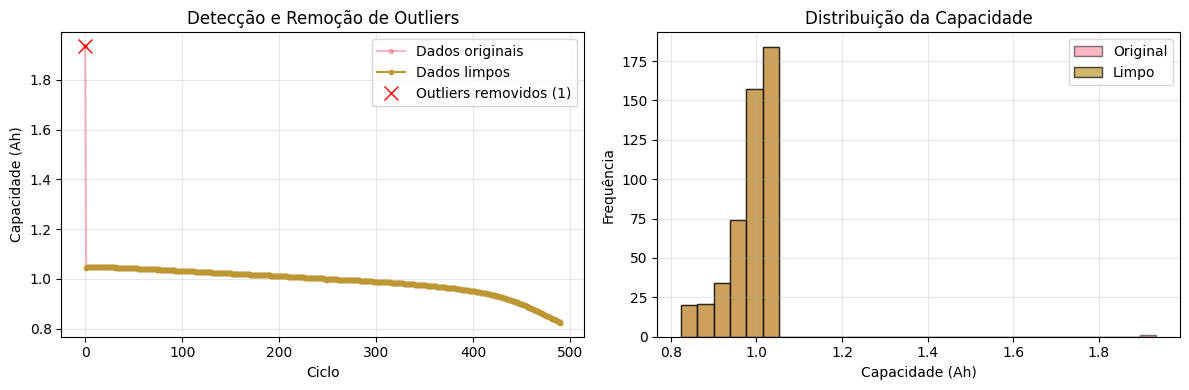

🔧 Capacidade de referência: 1.049 Ah
  • Primeiro valor: 1.045 Ah
  • Máximo dos primeiros ciclos: 1.050 Ah
  • Percentil 95 dos primeiros ciclos: 1.049 Ah

⚡ Análise de Degradação:
  • Dados utilizados: 490 pontos
  • Outliers removidos: 1
  • Capacidade de referência: 1.049 Ah
  • Capacidade final: 0.824 Ah
  • Retenção final: 78.5%
  • Degradação total: 21.5%
  • Ciclo EOL (80%): 482


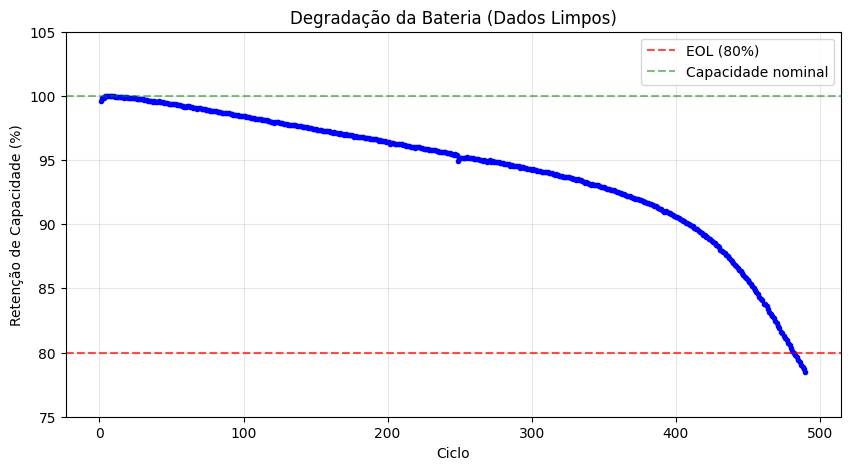


📊 DataFrame principal atualizado com 490 pontos limpos.
✅ Análise concluída!


In [5]:
# 4. Análise de Degradação da Bateria - Detecção Inteligente de Outliers

def analyze_data_quality(df, column='discharge_capacity'):
    """Analisa a qualidade dos dados para decidir se é necessário remover outliers"""
    
    # Estatísticas básicas
    mean_val = df[column].mean()
    std_val = df[column].std()
    median_val = df[column].median()
    
    # Coeficiente de variação
    cv = std_val / mean_val * 100
    
    # Diferença entre média e mediana (indicador de assimetria)
    mean_median_diff = abs(mean_val - median_val) / median_val * 100
    
    # Usar IQR para detecção mais robusta
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Outliers pelo método IQR (mais conservador)
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    iqr_outliers = df[(df[column] < iqr_lower) | (df[column] > iqr_upper)]
    
    # Outliers extremos pelo método IQR (3 * IQR)
    extreme_lower = q1 - 3 * iqr
    extreme_upper = q3 + 3 * iqr
    extreme_outliers = df[(df[column] < extreme_lower) | (df[column] > extreme_upper)]
    
    print(f"🔍 Análise de Qualidade dos Dados:")
    print(f"  • Média: {mean_val:.3f} ± {std_val:.3f}")
    print(f"  • Mediana: {median_val:.3f}")
    print(f"  • Coeficiente de variação: {cv:.1f}%")
    print(f"  • Diferença média-mediana: {mean_median_diff:.1f}%")
    print(f"  • IQR: [{q1:.3f}, {q3:.3f}] (amplitude: {iqr:.3f})")
    print(f"  • Outliers IQR: {len(iqr_outliers)} de {len(df)} pontos")
    print(f"  • Outliers extremos: {len(extreme_outliers)} de {len(df)} pontos")
    
    # Critérios para decidir se é necessário limpar
    needs_cleaning = False
    cleaning_reason = []
    
    if len(extreme_outliers) > 0:
        needs_cleaning = True
        cleaning_reason.append(f"{len(extreme_outliers)} outliers extremos")
    
    if cv > 10:  # Coeficiente de variação muito alto
        needs_cleaning = True
        cleaning_reason.append(f"alta variabilidade (CV={cv:.1f}%)")
    
    if mean_median_diff > 5:  # Grande diferença entre média e mediana
        needs_cleaning = True
        cleaning_reason.append(f"distribuição assimétrica ({mean_median_diff:.1f}%)")
    
    if needs_cleaning:
        print(f"  ⚠️  Recomendação: LIMPAR dados")
        print(f"      Razões: {', '.join(cleaning_reason)}")
        return extreme_outliers if len(extreme_outliers) > 0 else iqr_outliers
    else:
        print(f"  ✅ Recomendação: MANTER dados originais")
        print(f"      Os dados parecem estar dentro de limites aceitáveis")
        return pd.DataFrame()  # DataFrame vazio

def smart_capacity_reference(df):
    """Encontra uma capacidade de referência inteligente"""
    
    # Usar o percentil 95 dos primeiros 10% dos ciclos
    first_cycles = df.head(max(10, len(df) // 10))
    capacity_ref = first_cycles['discharge_capacity'].quantile(0.95)
    
    # Verificar se faz sentido
    first_value = df['discharge_capacity'].iloc[0]
    max_first_cycles = first_cycles['discharge_capacity'].max()
    
    print(f"🔧 Capacidade de referência: {capacity_ref:.3f} Ah")
    print(f"  • Primeiro valor: {first_value:.3f} Ah")
    print(f"  • Máximo dos primeiros ciclos: {max_first_cycles:.3f} Ah")
    print(f"  • Percentil 95 dos primeiros ciclos: {capacity_ref:.3f} Ah")
    
    return capacity_ref

# Analisar qualidade dos dados
outliers_to_remove = analyze_data_quality(summary_df)

# Decidir se limpar ou não
if len(outliers_to_remove) > 0:
    print(f"\n🧹 Removendo {len(outliers_to_remove)} outliers identificados...")
    clean_df = summary_df[~summary_df.index.isin(outliers_to_remove.index)].copy()
    data_was_cleaned = True
else:
    print(f"\n✅ Mantendo dados originais (não foram detectados outliers significativos)")
    clean_df = summary_df.copy()
    data_was_cleaned = False

# Visualizar apenas se houve limpeza
if data_was_cleaned:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(summary_df['cycle_index'], summary_df['discharge_capacity'], 'o-', 
             markersize=3, label='Dados originais', alpha=0.5)
    plt.plot(clean_df['cycle_index'], clean_df['discharge_capacity'], 'o-', 
             markersize=3, label='Dados limpos')
    plt.plot(outliers_to_remove['cycle_index'], outliers_to_remove['discharge_capacity'], 
             'rx', markersize=10, label=f'Outliers removidos ({len(outliers_to_remove)})')
    plt.xlabel('Ciclo')
    plt.ylabel('Capacidade (Ah)')
    plt.title('Detecção e Remoção de Outliers')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    bins = np.linspace(summary_df['discharge_capacity'].min(), 
                       summary_df['discharge_capacity'].max(), 30)
    plt.hist(summary_df['discharge_capacity'], bins=bins, alpha=0.5, 
             edgecolor='black', label='Original')
    plt.hist(clean_df['discharge_capacity'], bins=bins, alpha=0.7, 
             edgecolor='black', label='Limpo')
    plt.xlabel('Capacidade (Ah)')
    plt.ylabel('Frequência')
    plt.title('Distribuição da Capacidade')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    # Apenas um gráfico simples mostrando os dados
    plt.figure(figsize=(10, 4))
    plt.plot(summary_df['cycle_index'], summary_df['discharge_capacity'], 'o-', 
             markersize=3, color='blue')
    plt.xlabel('Ciclo')
    plt.ylabel('Capacidade (Ah)')
    plt.title('Capacidade de Descarga por Ciclo (Dados Originais)')
    plt.grid(True, alpha=0.3)
    plt.show()

# Encontrar capacidade de referência usando dados finais
capacity_reference = smart_capacity_reference(clean_df)

# Calcular métricas de degradação
clean_df['capacity_retention'] = clean_df['discharge_capacity'] / capacity_reference * 100
clean_df['capacity_fade'] = 100 - clean_df['capacity_retention']

# Encontrar EOL
eol_cycle = clean_df[clean_df['capacity_retention'] <= 80]['cycle_index'].min()

print(f"\n⚡ Análise de Degradação:")
print(f"  • Dados utilizados: {len(clean_df)} pontos")
if data_was_cleaned:
    print(f"  • Outliers removidos: {len(outliers_to_remove)}")
print(f"  • Capacidade de referência: {capacity_reference:.3f} Ah")
print(f"  • Capacidade final: {clean_df['discharge_capacity'].iloc[-1]:.3f} Ah")
print(f"  • Retenção final: {clean_df['capacity_retention'].iloc[-1]:.1f}%")
print(f"  • Degradação total: {100 - clean_df['capacity_retention'].iloc[-1]:.1f}%")
if not pd.isna(eol_cycle):
    print(f"  • Ciclo EOL (80%): {eol_cycle}")
else:
    print(f"  • Ainda não atingiu EOL (80%)")

# Plotar resultado final da degradação
plt.figure(figsize=(10, 5))
plt.plot(clean_df['cycle_index'], clean_df['capacity_retention'], 'o-', 
         markersize=3, color='blue')
plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='EOL (80%)')
plt.axhline(y=100, color='green', linestyle='--', alpha=0.5, label='Capacidade nominal')
plt.xlabel('Ciclo')
plt.ylabel('Retenção de Capacidade (%)')
title = 'Degradação da Bateria'
if data_was_cleaned:
    title += ' (Dados Limpos)'
else:
    title += ' (Dados Originais)'
plt.title(title)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(75, 105)
plt.show()

# Atualizar o summary_df apenas se houve limpeza
if data_was_cleaned:
    summary_df = clean_df.copy()
    print(f"\n📊 DataFrame principal atualizado com {len(summary_df)} pontos limpos.")
else:
    # Adicionar as colunas calculadas ao DataFrame original
    summary_df['capacity_retention'] = clean_df['capacity_retention']
    summary_df['capacity_fade'] = clean_df['capacity_fade']
    print(f"\n📊 DataFrame principal mantido com {len(summary_df)} pontos originais.")

print(f"✅ Análise concluída!")

In [6]:
cycles_interpolated_df

,voltage,current,internal_resistance,temperature,charge_capacity,discharge_capacity,cycle_index,step_type
0,2.800000,-0.454374,0.021079,30.624113,0.685290,1.176889,0,discharge
1,2.800701,-0.665535,0.021079,30.856833,0.461191,0.948841,0,discharge
2,2.801401,-0.876695,0.021079,31.089552,0.237091,0.720794,0,discharge
3,2.802102,-1.087855,0.021079,31.322273,0.012992,0.492746,0,discharge
4,2.802803,-0.110007,0.021079,30.255373,1.050779,1.548487,0,discharge
...,...,...,...,...,...,...,...,...
981995,NaN,NaN,NaN,NaN,1.411677,NaN,490,charge
981996,NaN,NaN,NaN,NaN,1.413095,NaN,490,charge
981997,NaN,NaN,NaN,NaN,1.414514,NaN,490,charge
981998,NaN,NaN,NaN,NaN,1.415933,NaN,490,charge


📊 Gerando visualizações...


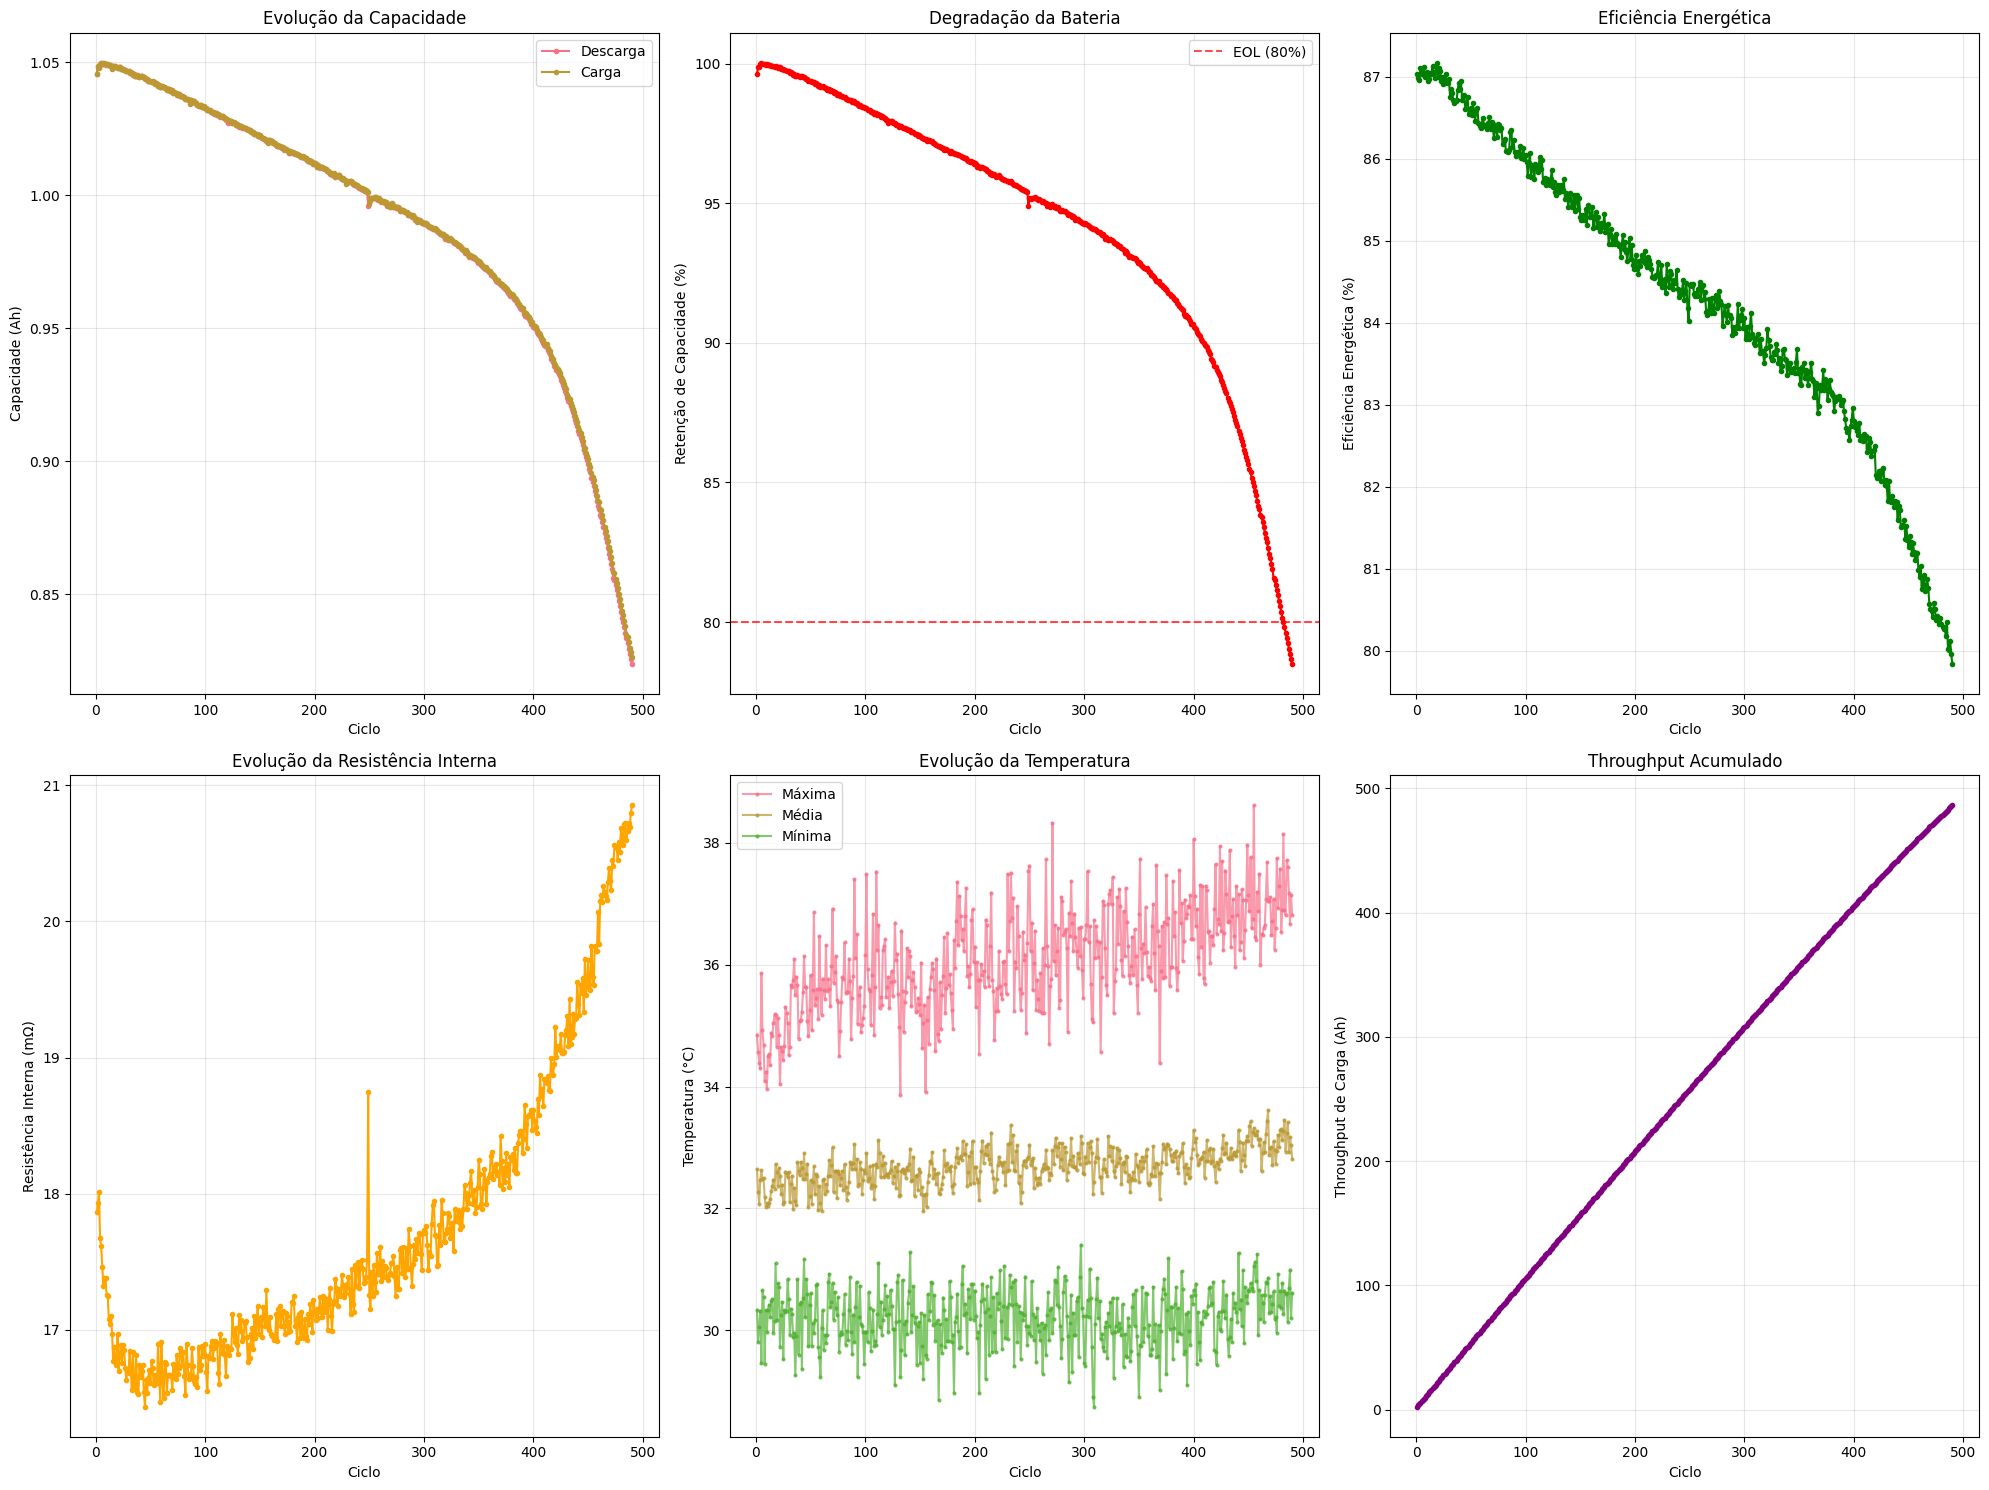

In [7]:
# 5. Visualizações Principais

# Função para criar subplots organizados
def create_analysis_plots():
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Evolução da Capacidade
    plt.subplot(2, 3, 1)
    plt.plot(summary_df['cycle_index'], summary_df['discharge_capacity'], 'o-', markersize=3, label='Descarga')
    plt.plot(summary_df['cycle_index'], summary_df['charge_capacity'], 'o-', markersize=3, label='Carga')
    plt.xlabel('Ciclo')
    plt.ylabel('Capacidade (Ah)')
    plt.title('Evolução da Capacidade')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Retenção de Capacidade
    plt.subplot(2, 3, 2)
    plt.plot(summary_df['cycle_index'], summary_df['capacity_retention'], 'o-', markersize=3, color='red')
    plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='EOL (80%)')
    plt.xlabel('Ciclo')
    plt.ylabel('Retenção de Capacidade (%)')
    plt.title('Degradação da Bateria')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Eficiência Energética
    plt.subplot(2, 3, 3)
    plt.plot(summary_df['cycle_index'], summary_df['energy_efficiency']*100, 'o-', markersize=3, color='green')
    plt.xlabel('Ciclo')
    plt.ylabel('Eficiência Energética (%)')
    plt.title('Eficiência Energética')
    plt.grid(True, alpha=0.3)
    
    # 4. Resistência Interna
    plt.subplot(2, 3, 4)
    plt.plot(summary_df['cycle_index'], summary_df['dc_internal_resistance']*1000, 'o-', markersize=3, color='orange')
    plt.xlabel('Ciclo')
    plt.ylabel('Resistência Interna (mΩ)')
    plt.title('Evolução da Resistência Interna')
    plt.grid(True, alpha=0.3)
    
    # 5. Temperatura
    plt.subplot(2, 3, 5)
    plt.plot(summary_df['cycle_index'], summary_df['temperature_maximum'], 'o-', markersize=2, label='Máxima', alpha=0.7)
    plt.plot(summary_df['cycle_index'], summary_df['temperature_average'], 'o-', markersize=2, label='Média', alpha=0.7)
    plt.plot(summary_df['cycle_index'], summary_df['temperature_minimum'], 'o-', markersize=2, label='Mínima', alpha=0.7)
    plt.xlabel('Ciclo')
    plt.ylabel('Temperatura (°C)')
    plt.title('Evolução da Temperatura')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 6. Throughput de Carga
    plt.subplot(2, 3, 6)
    plt.plot(summary_df['cycle_index'], summary_df['charge_throughput'], 'o-', markersize=3, color='purple')
    plt.xlabel('Ciclo')
    plt.ylabel('Throughput de Carga (Ah)')
    plt.title('Throughput Acumulado')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("📊 Gerando visualizações...")
create_analysis_plots()

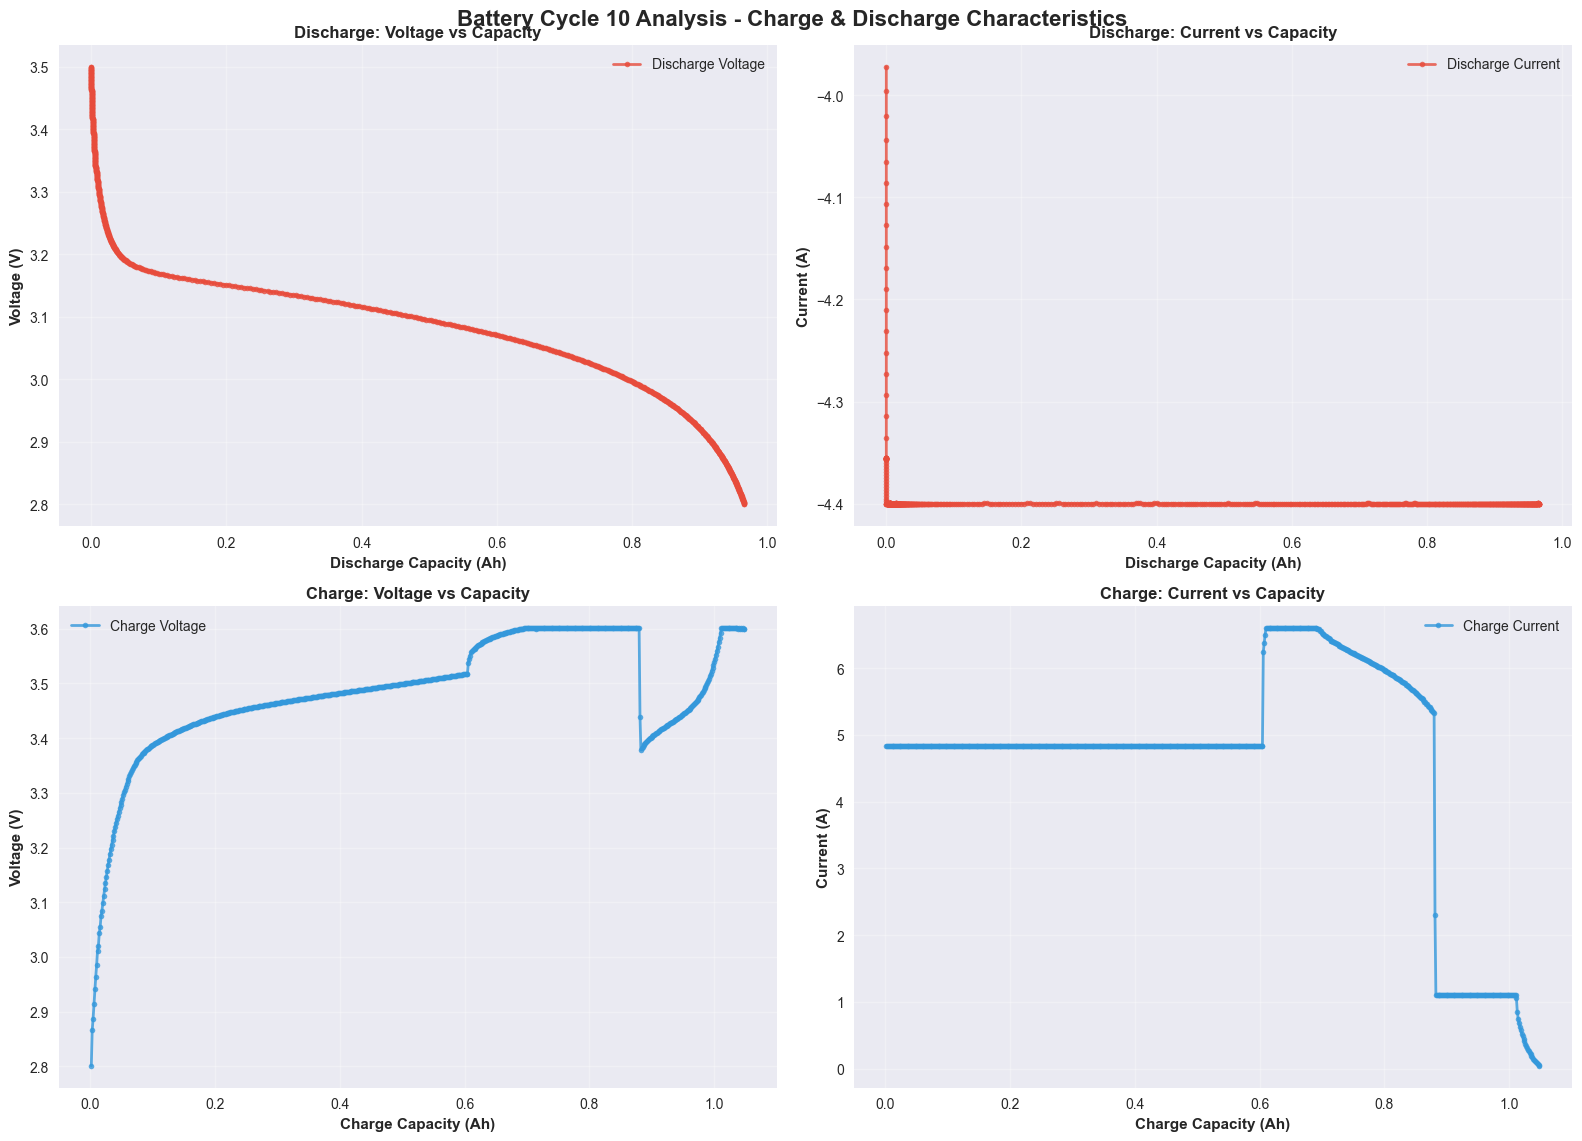

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting style
plt.style.use('seaborn-v0_8')  # Use seaborn style for better aesthetics
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Define colors for consistency
discharge_color = '#E74C3C'  # Red
charge_color = '#3498DB'     # Blue

# Create subplots for better organization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Battery Cycle 10 Analysis - Charge & Discharge Characteristics', 
             fontsize=16, fontweight='bold', y=0.95)

# DISCHARGE PLOTS
# Filter for discharge data
mask_discharge = (
    (cycles_interpolated_df['cycle_index'] == 10) &
    (cycles_interpolated_df['step_type'] == 'discharge')
)
discharge_data = cycles_interpolated_df[mask_discharge]

# Plot 1: Discharge Voltage vs Capacity
axes[0, 0].plot(discharge_data['discharge_capacity'], discharge_data['voltage'], 
                'o-', color=discharge_color, markersize=4, linewidth=2, alpha=0.8,
                label='Discharge Voltage')
axes[0, 0].set_xlabel('Discharge Capacity (Ah)', fontweight='bold')
axes[0, 0].set_ylabel('Voltage (V)', fontweight='bold')
axes[0, 0].set_title('Discharge: Voltage vs Capacity', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Discharge Current vs Capacity
axes[0, 1].plot(discharge_data['discharge_capacity'], discharge_data['current'], 
                'o-', color=discharge_color, markersize=4, linewidth=2, alpha=0.8,
                label='Discharge Current')
axes[0, 1].set_xlabel('Discharge Capacity (Ah)', fontweight='bold')
axes[0, 1].set_ylabel('Current (A)', fontweight='bold')
axes[0, 1].set_title('Discharge: Current vs Capacity', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# CHARGE PLOTS
# Filter for charge data
mask_charge = (
    (cycles_interpolated_df['cycle_index'] == 10) &
    (cycles_interpolated_df['step_type'] == 'charge')
)
charge_data = cycles_interpolated_df[mask_charge]

# Plot 3: Charge Voltage vs Capacity
axes[1, 0].plot(charge_data['charge_capacity'], charge_data['voltage'], 
                'o-', color=charge_color, markersize=4, linewidth=2, alpha=0.8,
                label='Charge Voltage')
axes[1, 0].set_xlabel('Charge Capacity (Ah)', fontweight='bold')
axes[1, 0].set_ylabel('Voltage (V)', fontweight='bold')
axes[1, 0].set_title('Charge: Voltage vs Capacity', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Charge Current vs Capacity
axes[1, 1].plot(charge_data['charge_capacity'], charge_data['current'], 
                'o-', color=charge_color, markersize=4, linewidth=2, alpha=0.8,
                label='Charge Current')
axes[1, 1].set_xlabel('Charge Capacity (Ah)', fontweight='bold')
axes[1, 1].set_ylabel('Current (A)', fontweight='bold')
axes[1, 1].set_title('Charge: Current vs Capacity', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Alternative: Individual plots with enhanced styling
def create_individual_plots():
    """Create individual plots with enhanced styling"""
    
    # Plot 1: Discharge Voltage
    plt.figure(figsize=(10, 6))
    plt.plot(discharge_data['discharge_capacity'], discharge_data['voltage'], 
             'o-', color=discharge_color, markersize=5, linewidth=2.5, alpha=0.9,
             label='Cycle 10 - Discharge')
    plt.xlabel('Discharge Capacity (Ah)', fontsize=14, fontweight='bold')
    plt.ylabel('Voltage (V)', fontsize=14, fontweight='bold')
    plt.title('Battery Discharge Curve - Cycle 10', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Discharge Current
    plt.figure(figsize=(10, 6))
    plt.plot(discharge_data['discharge_capacity'], discharge_data['current'], 
             'o-', color=discharge_color, markersize=5, linewidth=2.5, alpha=0.9,
             label='Cycle 10 - Discharge')
    plt.xlabel('Discharge Capacity (Ah)', fontsize=14, fontweight='bold')
    plt.ylabel('Current (A)', fontsize=14, fontweight='bold')
    plt.title('Battery Discharge Current - Cycle 10', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot 3: Charge Voltage
    plt.figure(figsize=(10, 6))
    plt.plot(charge_data['charge_capacity'], charge_data['voltage'], 
             'o-', color=charge_color, markersize=5, linewidth=2.5, alpha=0.9,
             label='Cycle 10 - Charge')
    plt.xlabel('Charge Capacity (Ah)', fontsize=14, fontweight='bold')
    plt.ylabel('Voltage (V)', fontsize=14, fontweight='bold')
    plt.title('Battery Charge Curve - Cycle 10', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot 4: Charge Current
    plt.figure(figsize=(10, 6))
    plt.plot(charge_data['charge_capacity'], charge_data['current'], 
             'o-', color=charge_color, markersize=5, linewidth=2.5, alpha=0.9,
             label='Cycle 10 - Charge')
    plt.xlabel('Charge Capacity (Ah)', fontsize=14, fontweight='bold')
    plt.ylabel('Current (A)', fontsize=14, fontweight='bold')
    plt.title('Battery Charge Current - Cycle 10', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Uncomment the line below to create individual plots instead of subplots
# create_individual_plots()





🔍 Análise de ciclos específicos em gráfico único...


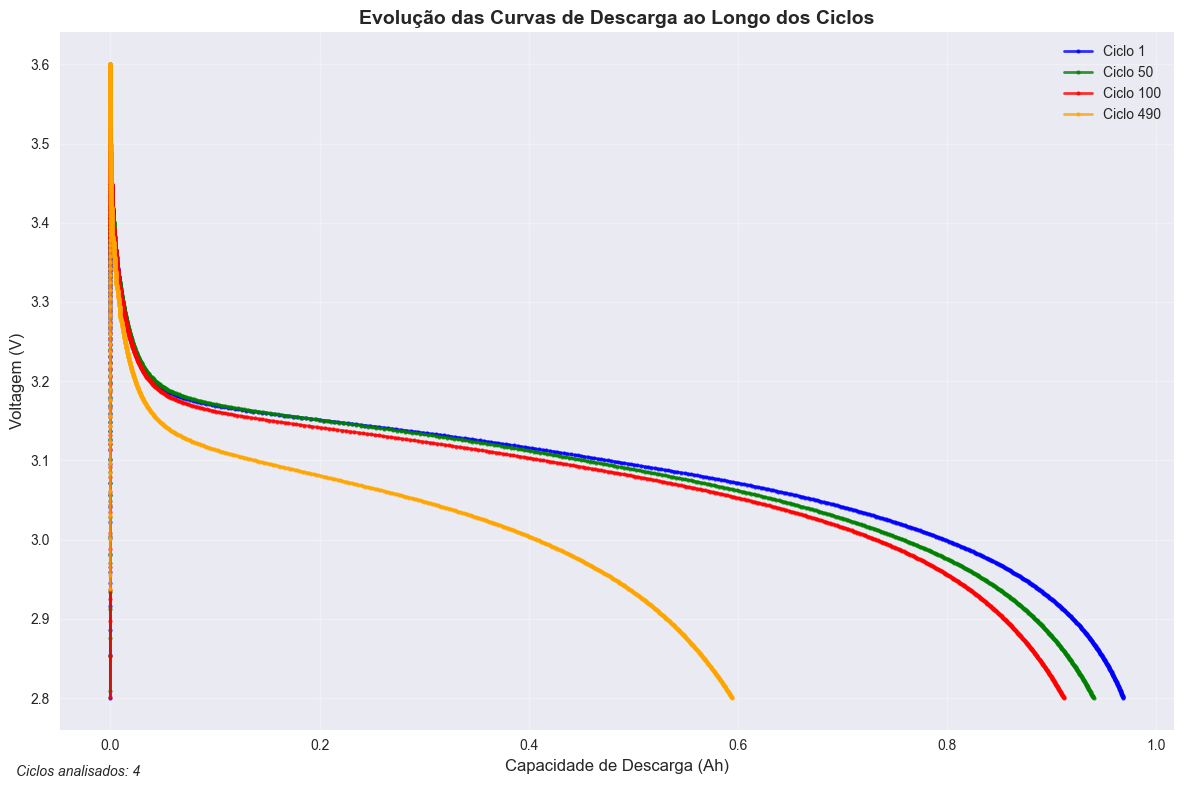

📊 Análise da evolução completa dos ciclos...


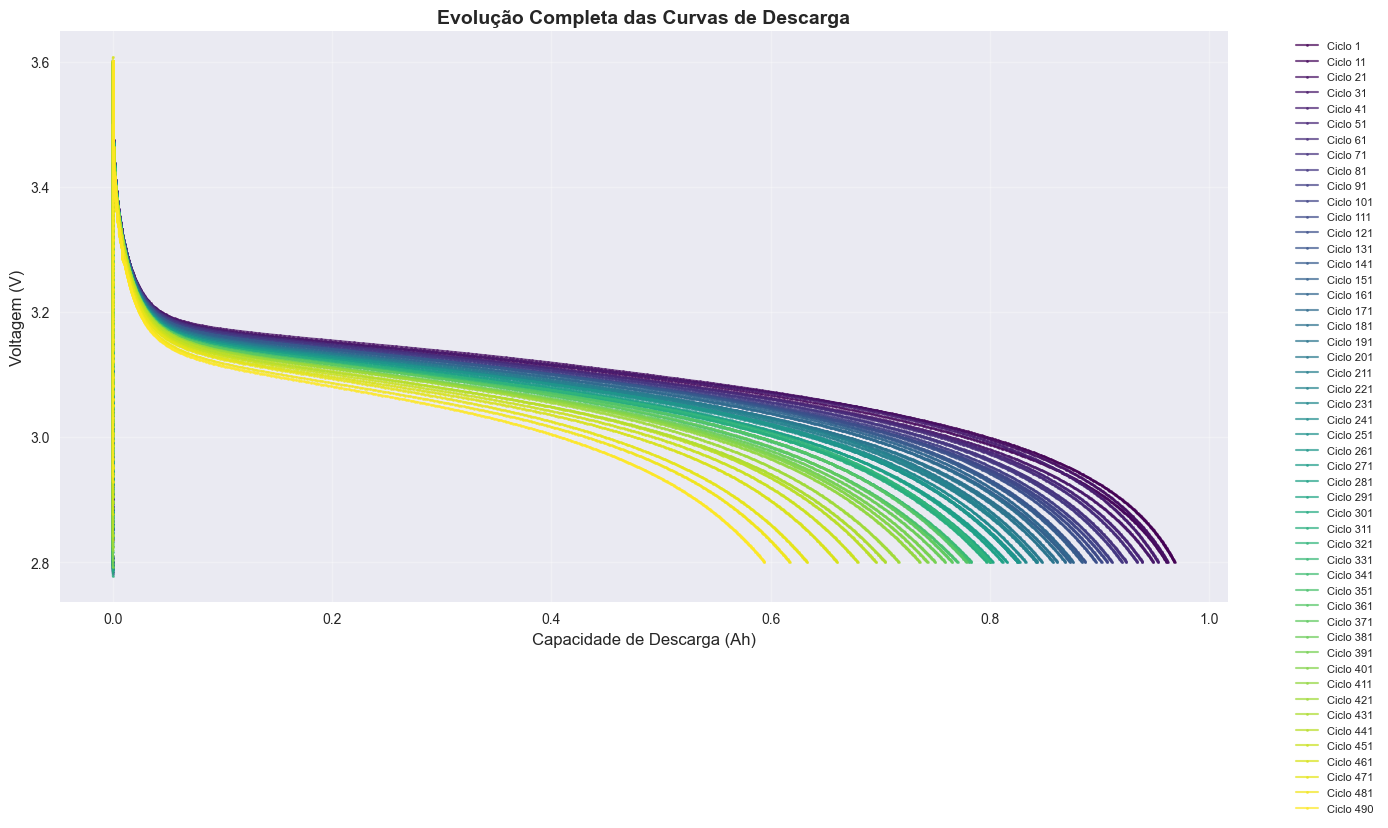

In [10]:
# 6. Análise Detalhada de Ciclos Específicos - Gráfico Único
def analyze_specific_cycles(cycle_list=[1, 50, 100, -1]):
    """Análise detalhada de ciclos específicos em um único gráfico"""
    
    if cycle_list[-1] == -1:
        cycle_list[-1] = summary_df['cycle_index'].max()
    
    # Criar uma única figura
    plt.figure(figsize=(12, 8))
    
    # Cores para distinguir os ciclos
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for i, cycle in enumerate(cycle_list):
        if cycle > summary_df['cycle_index'].max():
            continue
            
        cycle_data = cycles_interpolated_df[cycles_interpolated_df['cycle_index'] == cycle]
        
        if len(cycle_data) == 0:
            continue
        
        # Plotar voltagem vs capacidade para cada ciclo
        plt.plot(cycle_data['discharge_capacity'], cycle_data['voltage'], 
                'o-', markersize=3, linewidth=2, alpha=0.8,
                color=colors[i % len(colors)], 
                label=f'Ciclo {cycle}')
    
    plt.xlabel('Capacidade de Descarga (Ah)', fontsize=12)
    plt.ylabel('Voltagem (V)', fontsize=12)
    plt.title('Evolução das Curvas de Descarga ao Longo dos Ciclos', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10, loc='best')
    
    # Melhorar a aparência
    plt.tight_layout()
    
    # Adicionar informações estatísticas
    plt.figtext(0.02, 0.02, f'Ciclos analisados: {len([c for c in cycle_list if c <= summary_df["cycle_index"].max()])}', 
                fontsize=10, style='italic')
    
    plt.show()

print("🔍 Análise de ciclos específicos em gráfico único...")
analyze_specific_cycles()

# Versão alternativa com mais ciclos para melhor visualização da evolução
def analyze_cycle_evolution(start_cycle=1, end_cycle=None, step=10):
    """Análise da evolução com mais ciclos intermediários"""
    
    if end_cycle is None:
        end_cycle = summary_df['cycle_index'].max()
    
    cycle_list = list(range(start_cycle, end_cycle + 1, step))
    if end_cycle not in cycle_list:
        cycle_list.append(end_cycle)
    
    plt.figure(figsize=(14, 8))
    
    # Usar colormap para gradação de cores
    import matplotlib.cm as cm
    import numpy as np
    
    colormap = cm.get_cmap('viridis')
    colors = colormap(np.linspace(0, 1, len(cycle_list)))
    
    for i, cycle in enumerate(cycle_list):
        if cycle > summary_df['cycle_index'].max():
            continue
            
        cycle_data = cycles_interpolated_df[cycles_interpolated_df['cycle_index'] == cycle]
        
        if len(cycle_data) == 0:
            continue
        
        # Plotar com gradação de cores
        plt.plot(cycle_data['discharge_capacity'], cycle_data['voltage'], 
                'o-', markersize=2, linewidth=1.5, alpha=0.7,
                color=colors[i], 
                label=f'Ciclo {cycle}')
    
    plt.xlabel('Capacidade de Descarga (Ah)', fontsize=12)
    plt.ylabel('Voltagem (V)', fontsize=12)
    plt.title('Evolução Completa das Curvas de Descarga', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Legenda mais compacta
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    plt.tight_layout()
    plt.show()

print("📊 Análise da evolução completa dos ciclos...")
analyze_cycle_evolution()

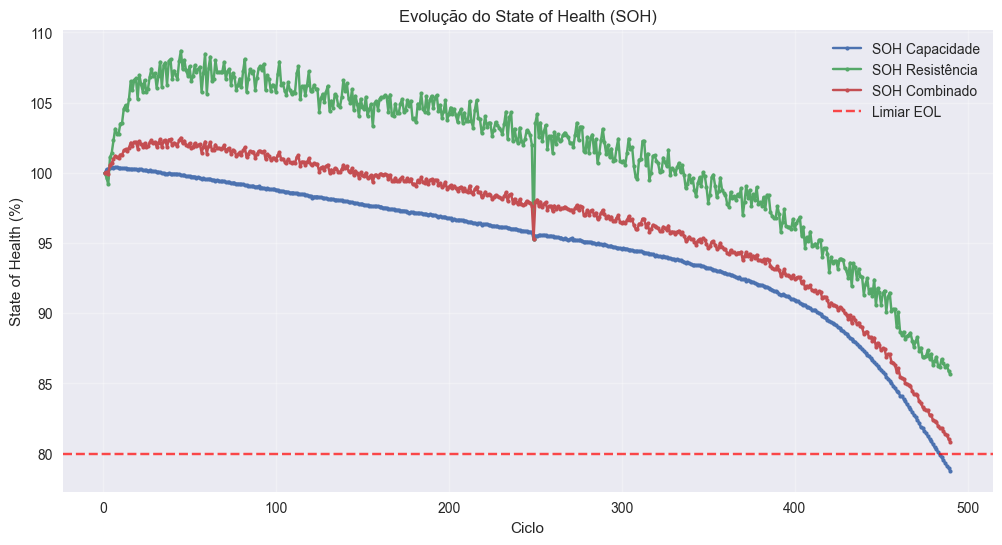

Métricas SOH calculadas e plotadas!


In [11]:
# 7. Métricas de Saúde da Bateria (State of Health - SOH)

def calculate_soh_metrics():
    """Calcular métricas de State of Health"""
    
    # Capacidade nominal (primeiro ciclo)
    capacity_nominal = summary_df['discharge_capacity'].iloc[0]
    
    # SOH baseado na capacidade
    summary_df['soh_capacity'] = summary_df['discharge_capacity'] / capacity_nominal
    
    # SOH baseado na resistência interna
    resistance_nominal = summary_df['dc_internal_resistance'].iloc[0]
    summary_df['soh_resistance'] = resistance_nominal / summary_df['dc_internal_resistance']
    
    # SOH combinado (média ponderada)
    summary_df['soh_combined'] = (0.7 * summary_df['soh_capacity'] + 0.3 * summary_df['soh_resistance'])
    
    return summary_df[['cycle_index', 'soh_capacity', 'soh_resistance', 'soh_combined']]

soh_metrics = calculate_soh_metrics()

# Plotar métricas SOH
plt.figure(figsize=(12, 6))
plt.plot(soh_metrics['cycle_index'], soh_metrics['soh_capacity']*100, 'o-', markersize=3, label='SOH Capacidade')
plt.plot(soh_metrics['cycle_index'], soh_metrics['soh_resistance']*100, 'o-', markersize=3, label='SOH Resistência')
plt.plot(soh_metrics['cycle_index'], soh_metrics['soh_combined']*100, 'o-', markersize=3, label='SOH Combinado')
plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Limiar EOL')
plt.xlabel('Ciclo')
plt.ylabel('State of Health (%)')
plt.title('Evolução do State of Health (SOH)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Métricas SOH calculadas e plotadas!")

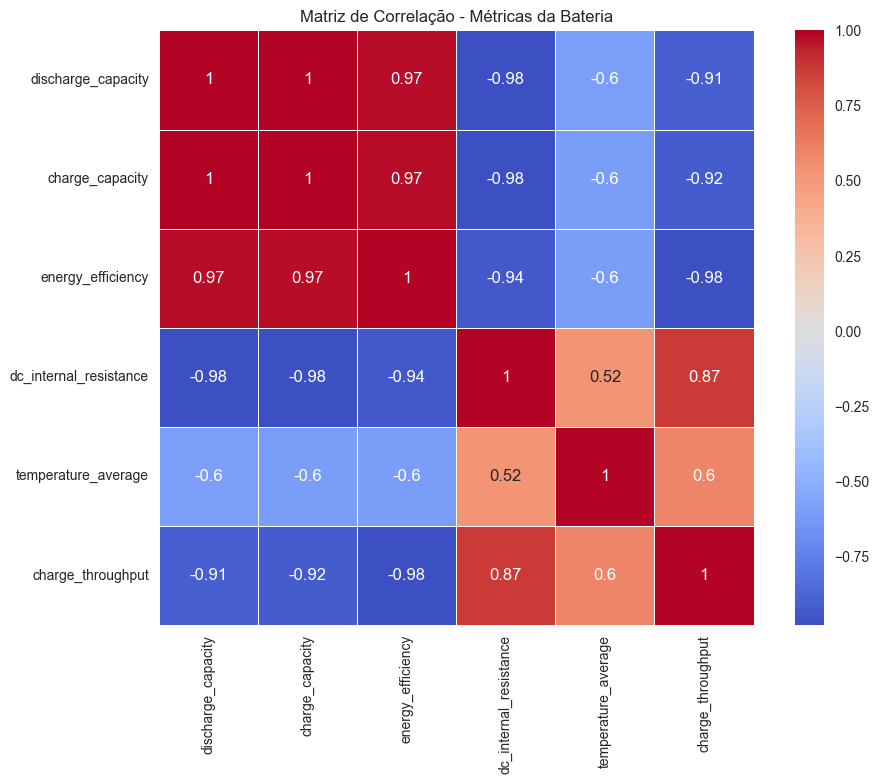

Análise de correlações concluída!


In [12]:
# 8. Análise de Correlações

# Matriz de correlação das principais métricas
correlation_cols = [
    'discharge_capacity', 'charge_capacity', 'energy_efficiency', 
    'dc_internal_resistance', 'temperature_average', 'charge_throughput'
]

correlation_matrix = summary_df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlação - Métricas da Bateria')
plt.tight_layout()
plt.show()

print("Análise de correlações concluída!")

🔮 Realizando predição simples de fim de vida...


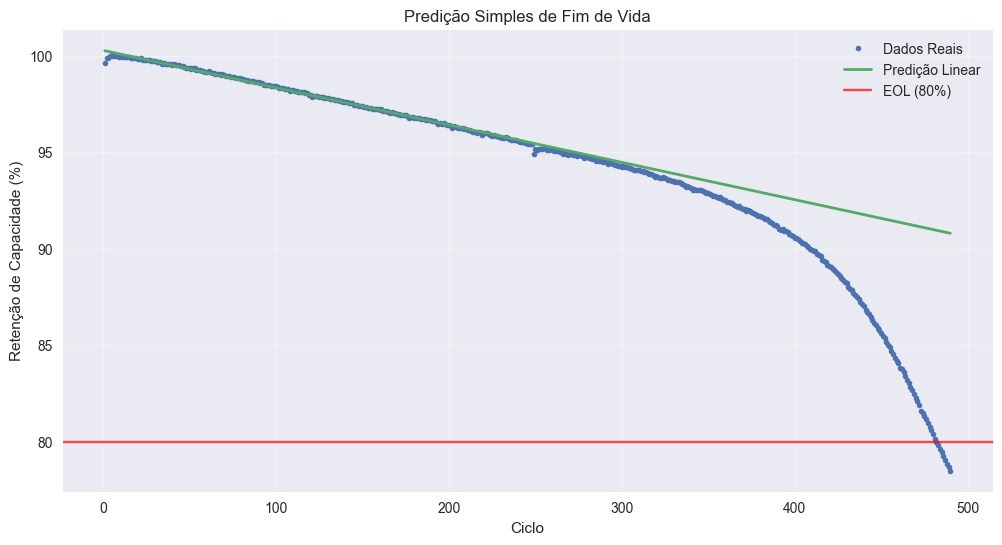

📈 Resultados da Predição:
  • R² Score: 0.645
  • EOL não encontrado na extrapolação


In [13]:
# 9. Predição Simples de Fim de Vida

def predict_eol_simple():
    """Predição simples de fim de vida usando regressão linear"""
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    
    # Usar apenas os primeiros 50% dos dados para predição
    train_size = len(summary_df) // 2
    train_data = summary_df.iloc[:train_size]
    
    X_train = train_data['cycle_index'].values.reshape(-1, 1)
    y_train = train_data['capacity_retention'].values
    
    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predizer para todos os ciclos
    X_all = summary_df['cycle_index'].values.reshape(-1, 1)
    y_pred = model.predict(X_all)
    
    # Encontrar quando atingirá 80%
    future_cycles = np.arange(summary_df['cycle_index'].max(), 
                             summary_df['cycle_index'].max() + 500, 10)
    X_future = future_cycles.reshape(-1, 1)
    y_future = model.predict(X_future)
    
    eol_pred_cycle = None
    for i, (cycle, retention) in enumerate(zip(future_cycles, y_future)):
        if retention <= 80:
            eol_pred_cycle = cycle
            break
    
    # Plotar predição
    plt.figure(figsize=(12, 6))
    plt.plot(summary_df['cycle_index'], summary_df['capacity_retention'], 'o', markersize=4, label='Dados Reais')
    plt.plot(summary_df['cycle_index'], y_pred, '-', linewidth=2, label='Predição Linear')
    if eol_pred_cycle:
        plt.plot(future_cycles, y_future, '--', alpha=0.7, label='Extrapolação')
        plt.axvline(x=eol_pred_cycle, color='red', linestyle='--', alpha=0.7)
        plt.text(eol_pred_cycle, 85, f'EOL Predito: {eol_pred_cycle:.0f}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.axhline(y=80, color='red', linestyle='-', alpha=0.7, label='EOL (80%)')
    plt.xlabel('Ciclo')
    plt.ylabel('Retenção de Capacidade (%)')
    plt.title('Predição Simples de Fim de Vida')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    r2 = r2_score(summary_df['capacity_retention'], y_pred)
    print(f"📈 Resultados da Predição:")
    print(f"  • R² Score: {r2:.3f}")
    if eol_pred_cycle:
        print(f"  • EOL Predito: Ciclo {eol_pred_cycle:.0f}")
    else:
        print(f"  • EOL não encontrado na extrapolação")

print("🔮 Realizando predição simples de fim de vida...")
predict_eol_simple()

In [14]:
# 10. Relatório Final

print("\n" + "="*50)
print("📋 RELATÓRIO FINAL - ANÁLISE DA BATERIA")
print("="*50)

print(f"🔋 Informações Gerais:")
print(f"  • Barcode: {data.get('barcode', 'N/A')}")
print(f"  • Total de ciclos testados: {len(summary_df)}")
print(f"  • Período de teste: Ciclo {summary_df['cycle_index'].min()} a {summary_df['cycle_index'].max()}")

print(f"\n⚡ Desempenho da Bateria:")
print(f"  • Capacidade inicial: {summary_df['discharge_capacity'].iloc[0]:.3f} Ah")
print(f"  • Capacidade final: {summary_df['discharge_capacity'].iloc[-1]:.3f} Ah")
print(f"  • Degradação total: {100 - summary_df['capacity_retention'].iloc[-1]:.1f}%")
print(f"  • Taxa de degradação: {(100 - summary_df['capacity_retention'].iloc[-1])/len(summary_df):.3f}% por ciclo")

print(f"\n🌡️ Condições Operacionais:")
print(f"  • Temperatura média: {summary_df['temperature_average'].mean():.1f}°C")
print(f"  • Faixa de temperatura: {summary_df['temperature_minimum'].min():.1f}°C a {summary_df['temperature_maximum'].max():.1f}°C")
print(f"  • Eficiência energética média: {summary_df['energy_efficiency'].mean()*100:.1f}%")

print(f"\n🔧 Estado da Bateria:")
print(f"  • Resistência interna inicial: {summary_df['dc_internal_resistance'].iloc[0]*1000:.1f} mΩ")
print(f"  • Resistência interna final: {summary_df['dc_internal_resistance'].iloc[-1]*1000:.1f} mΩ")
print(f"  • Aumento da resistência: {((summary_df['dc_internal_resistance'].iloc[-1]/summary_df['dc_internal_resistance'].iloc[0])-1)*100:.1f}%")

eol_cycle = summary_df[summary_df['capacity_retention'] <= 80]['cycle_index'].min()
if not pd.isna(eol_cycle):
    print(f"\n⏰ Fim de Vida:")
    print(f"  • EOL atingido no ciclo: {eol_cycle}")
    print(f"  • Ciclos até EOL: {eol_cycle - summary_df['cycle_index'].min()}")
else:
    print(f"\n⏰ Fim de Vida:")
    print(f"  • EOL ainda não atingido")
    print(f"  • Retenção atual: {summary_df['capacity_retention'].iloc[-1]:.1f}%")

print(f"\n💡 Recomendações:")
if summary_df['capacity_retention'].iloc[-1] > 80:
    print(f"  • Bateria ainda em bom estado operacional")
    print(f"  • Continuar monitoramento da degradação")
else:
    print(f"  • Bateria próxima ou além do fim de vida útil")
    print(f"  • Considerar substituição")

if summary_df['temperature_maximum'].max() > 45:
    print(f"  • Temperaturas elevadas detectadas - considerar melhor gestão térmica")

if summary_df['energy_efficiency'].mean() < 0.95:
    print(f"  • Eficiência energética pode ser melhorada")

print(f"\n📊 Este notebook fornece uma análise completa dos dados de teste da bateria.")
print(f"Para análises mais avançadas, considere:")
print(f"  • Modelos de machine learning para predição de vida útil")
print(f"  • Análise de impedância eletroquímica")
print(f"  • Comparação com outras baterias do dataset")
print(f"  • Análise de diferentes protocolos de carregamento")

print("\n✅ Análise concluída!")


📋 RELATÓRIO FINAL - ANÁLISE DA BATERIA
🔋 Informações Gerais:
  • Barcode: el150800440551
  • Total de ciclos testados: 490
  • Período de teste: Ciclo 1 a 490

⚡ Desempenho da Bateria:
  • Capacidade inicial: 1.045 Ah
  • Capacidade final: 0.824 Ah
  • Degradação total: 21.5%
  • Taxa de degradação: 0.044% por ciclo

🌡️ Condições Operacionais:
  • Temperatura média: 32.7°C
  • Faixa de temperatura: 28.7°C a 38.6°C
  • Eficiência energética média: 84.3%

🔧 Estado da Bateria:
  • Resistência interna inicial: 17.9 mΩ
  • Resistência interna final: 20.9 mΩ
  • Aumento da resistência: 16.7%

⏰ Fim de Vida:
  • EOL atingido no ciclo: 482
  • Ciclos até EOL: 481

💡 Recomendações:
  • Bateria próxima ou além do fim de vida útil
  • Considerar substituição
  • Eficiência energética pode ser melhorada

📊 Este notebook fornece uma análise completa dos dados de teste da bateria.
Para análises mais avançadas, considere:
  • Modelos de machine learning para predição de vida útil
  • Análise de impe